# Stock Tweet and Price Analysis

In this notebookIll analyze stock prices and tweets related to various companiesIWe will perform data preprocessing, exploratory data analysis (EDA), and implement time series forecasting models

###  Extract ZIP File
Extract the contents of the  ZIP file provided on Moodle

In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
import zipfile
import os

# Path to the zip file
zip_file_path = 'data/stock-tweet-and-price.zip'
extract_path = 'data/stock-tweet-and-price/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted files
extracted_files = os.listdir(extract_path)
print("Files in the extracted directory:", extracted_files)

import time
notebook_start_time = time.time()


Files in the extracted directory: ['stock-tweet-and-price']


### Step 2: Verify Nested Directory

Check the contents of the nested directory to ensure all files are extracted properly.


In [3]:
# Assuming there is an additional nested directory
nested_extract_path = os.path.join(extract_path, 'stock-tweet-and-price')
nested_files = os.listdir(nested_extract_path)
print("Files in the nested extracted directory:", nested_files)


Files in the nested extracted directory: ['stockprice', 'stocktweet']


### Step 3: Check Stock Price Files

Verify the contents of the 'stockprice' directory.


In [2]:
# Check the contents of the 'stockprice' directory
stockprice_dir = os.path.join(nested_extract_path, 'stockprice')
stockprice_files = os.listdir(stockprice_dir)
print("Files in the stockprice directory:", stockprice_files)


NameError: name 'nested_extract_path' is not defined

### Step 4: Check Stock Tweet Files

Verify the contents of the 'stocktweet' directory.


In [4]:
# Check the contents of the 'stocktweet' directory
stocktweet_dir = os.path.join(nested_extract_path, 'stocktweet')
stocktweet_files = os.listdir(stocktweet_dir)
print("Files in the stocktweet directory:", stocktweet_files)


Files in the stocktweet directory: ['.ipynb_checkpoints', 'stocktweet.csv']


### Step 5: Load Tweets Dataset

Load the tweet dataset and display the first few rows.


In [5]:
import pandas as pd

# Load the tweet dataset
tweets_csv_path = os.path.join(stocktweet_dir, 'stocktweet.csv')
tweets_df = pd.read_csv(tweets_csv_path)
print("First few rows of the tweets dataset:")
display(tweets_df.head())


First few rows of the tweets dataset:


,id,date,ticker,tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars..."


### Step 6: Load Stock Price Data

Load stock price data for a few companies to start.


In [6]:
# Load stock price data for a few companies
companies = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
stock_data = {}
for company in companies:
    company_csv_path = os.path.join(stockprice_dir, f'{company}.csv')
    stock_data[company] = pd.read_csv(company_csv_path)
    print(f"First few rows of the {company} dataset:")
    display(stock_data[company].head())


First few rows of the AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


First few rows of the AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


First few rows of the GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


First few rows of the MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100


First few rows of the TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


### Step 7: Sentiment Analysis on Tweets

Perform sentiment analysis on the tweet text using TextBlob.


In [7]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the tweet text
tweets_df['sentiment'] = tweets_df['tweet'].apply(get_sentiment)

# Display the updated tweets dataset with sentiment scores
print("First few rows of the tweets dataset with sentiment scores:")
display(tweets_df.head())


First few rows of the tweets dataset with sentiment scores:


,id,date,ticker,tweet,sentiment
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳,0.000000
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...,0.156250
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...,0.000000
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏",0.468182
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars...",0.500000


### Step 8: Integrate Sentiment Scores

Aggregate sentiment scores by date and merge them with the stock price data.


In [8]:
# Convert date column to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%d/%m/%Y')

# Aggregate sentiment scores by date
daily_sentiment = tweets_df.groupby('date')['sentiment'].mean().reset_index()

# Convert `date` column in `daily_sentiment` to datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Merge the sentiment scores with the stock price data for each company
for company in companies:
    df = stock_data[company]
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Merge sentiment scores
    df = df.merge(daily_sentiment, left_on='Date', right_on='date', how='left')
    df = df.drop(columns=['date'])
    
    stock_data[company] = df

    # Display the merged dataset
    print(f"First few rows of the merged {company} dataset:")
    display(df.head())


First few rows of the merged AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,0.055524
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,0.156667
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,0.161855
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,0.131440


First few rows of the merged AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,NaN
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.055524
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.156667
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.161855
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.131440


First few rows of the merged GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,NaN
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000,0.055524
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000,0.156667
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000,0.161855
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000,0.131440


First few rows of the merged MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400,NaN
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100,0.055524
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200,0.156667
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700,0.161855
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100,0.131440


First few rows of the merged TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,NaN
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.055524
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.156667
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.161855
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.131440


### Step 9: Clean Up Extra Sentiment Columns

Ensure there is only one 'sentiment' column in each DataFrame before creating lag features.


In [9]:
# Ensure only one 'sentiment' column
for company in companies:
    df = stock_data[company]
    
    # List of unwanted sentiment columns
    unwanted_sentiment_cols = [col for col in df.columns if 'sentiment' in col and col != 'sentiment']
    
    # Drop unwanted sentiment columns
    df = df.drop(columns=unwanted_sentiment_cols, errors='ignore')
    
    stock_data[company] = df

    # Display the cleaned dataset
    print(f"Cleaned {company} dataset:")
    display(stock_data[company].head())


Cleaned AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,0.055524
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,0.156667
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,0.161855
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,0.131440


Cleaned AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,NaN
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.055524
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.156667
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.161855
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.131440


Cleaned GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,NaN
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000,0.055524
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000,0.156667
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000,0.161855
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000,0.131440


Cleaned MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400,NaN
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100,0.055524
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200,0.156667
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700,0.161855
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100,0.131440


Cleaned TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,NaN
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.055524
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.156667
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.161855
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.131440


### Step 10: Prepare Data for Time Series Forecasting

Create lag features for the stock prices and sentiment scores, and split the data into training and testing sets.


In [10]:
from sklearn.model_selection import train_test_split

# Function to create lag features
def create_lag_features(df, lags, target_col):
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    return df

# Define the lags and the target column
lags = [1, 3, 7]
target_col = 'Close'

# Prepare the data for each company
prepared_stock_data = {}
for company in companies:
    df = stock_data[company]
    
    # Create lag features for the Close price and sentiment
    df = create_lag_features(df, lags, target_col)
    df = create_lag_features(df, lags, 'sentiment')
    
    # Drop rows with NaN values created by the lag features
    df = df.dropna()
    
    # Set Date as index
    df = df.set_index('Date')
    
    # Split the data into training and testing sets
    X = df.drop(columns=['Close'])
    y = df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Store the prepared data
    prepared_stock_data[company] = (X_train, X_test, y_train, y_test)

    print(f"Prepared data for {company}:")
    print("X_train:")
    display(X_train.head())
    print("y_train:")
    display(y_train.head())


Prepared data for AAPL:
X_train:


,Open,High,Low,Adj Close,Volume,sentiment,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-13,77.910004,79.267502,77.787498,77.198143,121532000,0.047292,77.582497,75.797501,75.087502,0.179668,0.148240,0.055524
2020-01-14,79.175003,79.392502,78.042503,76.155716,161954400,0.138193,79.239998,77.407501,74.357498,0.047292,0.240034,0.156667
2020-01-15,77.962502,78.875000,77.387497,75.829361,121923600,0.102847,78.169998,77.582497,74.949997,0.138193,0.179668,0.161855
2020-01-16,78.397499,78.925003,78.022499,76.779221,108829200,0.010063,77.834999,79.239998,74.597504,0.102847,0.047292,0.131440
2020-01-17,79.067497,79.684998,78.750000,77.629234,137816400,0.131451,78.809998,78.169998,75.797501,0.010063,0.138193,0.148240


y_train:


Date
2020-01-13    79.239998
2020-01-14    78.169998
2020-01-15    77.834999
2020-01-16    78.809998
2020-01-17    79.682503
Name: Close, dtype: float64

Prepared data for AMZN:
X_train:


,Open,High,Low,Adj Close,Volume,sentiment,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-13,94.565498,94.900002,94.040001,94.565002,55616000,0.047292,94.157997,94.598503,94.900497,0.179668,0.148240,0.055524
2020-01-14,94.293999,94.355499,92.927498,93.472000,68818000,0.138193,94.565002,95.052498,93.748497,0.047292,0.240034,0.156667
2020-01-15,93.612503,93.943001,92.754501,93.100998,57932000,0.102847,93.472000,94.157997,95.143997,0.138193,0.179668,0.161855
2020-01-16,94.149498,94.279503,93.301003,93.897003,53190000,0.010063,93.100998,94.565002,95.343002,0.102847,0.047292,0.131440
2020-01-17,94.294502,94.332001,92.862503,93.236000,79946000,0.131451,93.897003,93.472000,94.598503,0.010063,0.138193,0.148240


y_train:


Date
2020-01-13    94.565002
2020-01-14    93.472000
2020-01-15    93.100998
2020-01-16    93.897003
2020-01-17    93.236000
Name: Close, dtype: float64

Prepared data for GOOG:
X_train:


,Open,High,Low,Adj Close,Volume,sentiment,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-13,71.806503,72.026001,71.301003,71.961502,33046000,0.047292,71.486504,70.216003,68.368500,0.179668,0.148240,0.055524
2020-01-14,71.950500,72.089996,71.418503,71.543999,31178000,0.138193,71.961502,70.991501,68.032997,0.047292,0.240034,0.156667
2020-01-15,71.510498,72.069748,71.510498,71.959999,25654000,0.102847,71.543999,71.486504,69.710503,0.138193,0.179668,0.161855
2020-01-16,72.372002,72.599503,72.045998,72.584999,23474000,0.010063,71.959999,71.961502,69.667000,0.102847,0.047292,0.131440
2020-01-17,73.145500,74.064751,72.911003,74.019501,47924000,0.131451,72.584999,71.543999,70.216003,0.010063,0.138193,0.148240


y_train:


Date
2020-01-13    71.961502
2020-01-14    71.543999
2020-01-15    71.959999
2020-01-16    72.584999
2020-01-17    74.019501
Name: Close, dtype: float64

Prepared data for MSFT:
X_train:


,Open,High,Low,Adj Close,Volume,sentiment,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-13,161.759995,163.309998,161.259995,157.342804,21626500,0.047292,161.339996,160.089996,160.619995,0.179668,0.148240,0.055524
2020-01-14,163.389999,163.600006,161.720001,156.234604,23477400,0.138193,163.279999,162.089996,158.619995,0.047292,0.240034,0.156667
2020-01-15,162.619995,163.940002,162.570007,157.246429,21417900,0.102847,162.130005,161.339996,159.029999,0.138193,0.179668,0.161855
2020-01-16,164.350006,166.240005,164.029999,160.127701,23865400,0.010063,163.179993,163.279999,157.580002,0.102847,0.047292,0.131440
2020-01-17,167.419998,167.470001,165.429993,161.023911,34371700,0.131451,166.169998,162.130005,160.089996,0.010063,0.138193,0.148240


y_train:


Date
2020-01-13    163.279999
2020-01-14    162.130005
2020-01-15    163.179993
2020-01-16    166.169998
2020-01-17    167.100006
Name: Close, dtype: float64

Prepared data for TSLA:
X_train:


,Open,High,Low,Adj Close,Volume,sentiment,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-13,32.900002,35.042000,32.799999,34.990665,397764000,0.047292,31.876667,32.809334,28.684000,0.179668,0.148240,0.055524
2020-01-14,36.284000,36.493999,34.993332,35.861332,434943000,0.138193,34.990665,32.089333,29.534000,0.047292,0.240034,0.156667
2020-01-15,35.317333,35.855999,34.452667,34.566666,260532000,0.102847,35.861332,31.876667,30.102667,0.138193,0.179668,0.161855
2020-01-16,32.916668,34.297333,32.811333,34.232666,326050500,0.010063,34.566666,34.990665,31.270666,0.102847,0.047292,0.131440
2020-01-17,33.840668,34.377998,33.543999,34.033333,204436500,0.131451,34.232666,35.861332,32.809334,0.010063,0.138193,0.148240


y_train:


Date
2020-01-13    34.990665
2020-01-14    35.861332
2020-01-15    34.566666
2020-01-16    34.232666
2020-01-17    34.033333
Name: Close, dtype: float64

### Step 11: Implement and Evaluate ARIMA Model

Implement and evaluate the ARIMA model for time series forecasting.



ARIMA model results for AAPL:
Mean Squared Error: 6.612454828807698
Saved plot for AAPL as images/001_AAPL.png


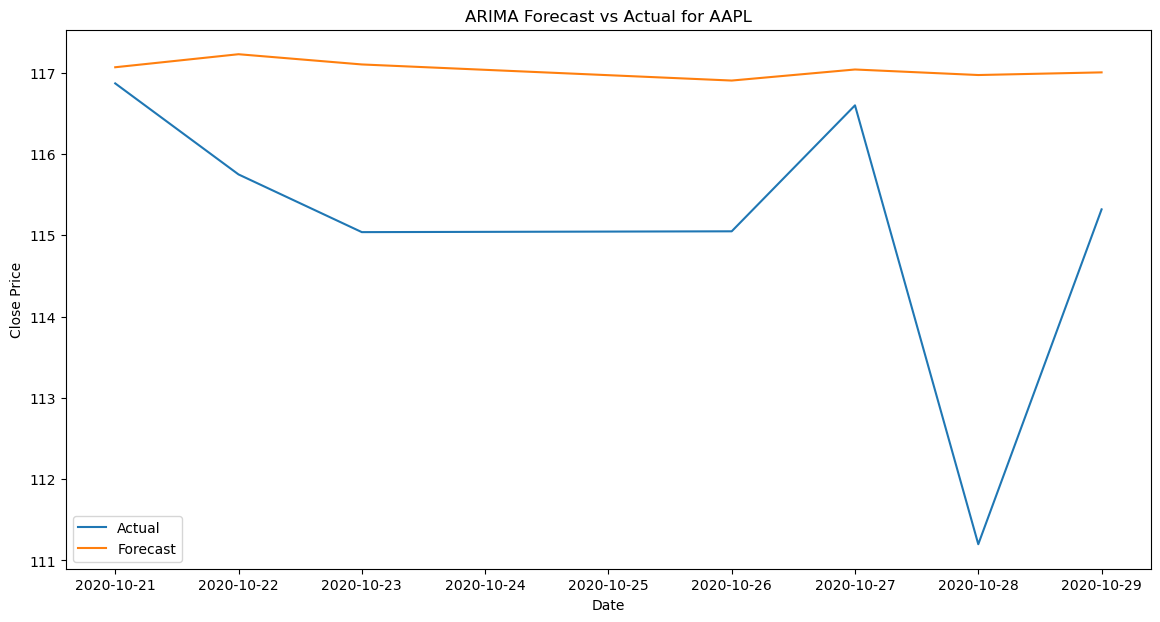


ARIMA model results for AMZN:
Mean Squared Error: 3.8413467743578615
Saved plot for AMZN as images/002_AMZN.png


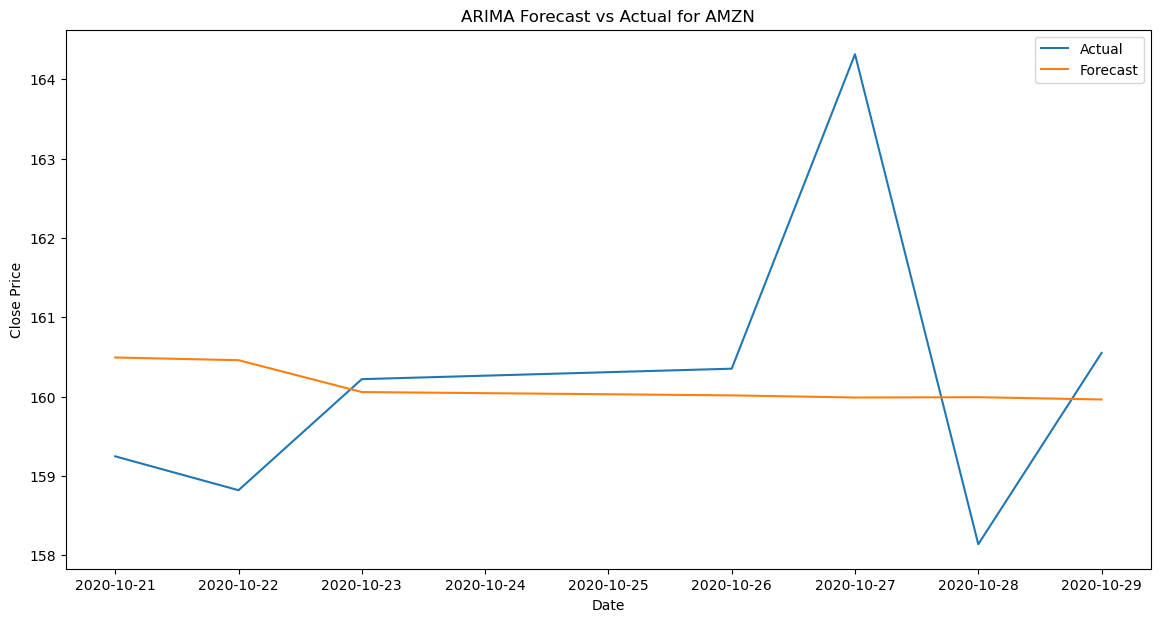


ARIMA model results for GOOG:
Mean Squared Error: 7.585232089049685
Saved plot for GOOG as images/003_GOOG.png


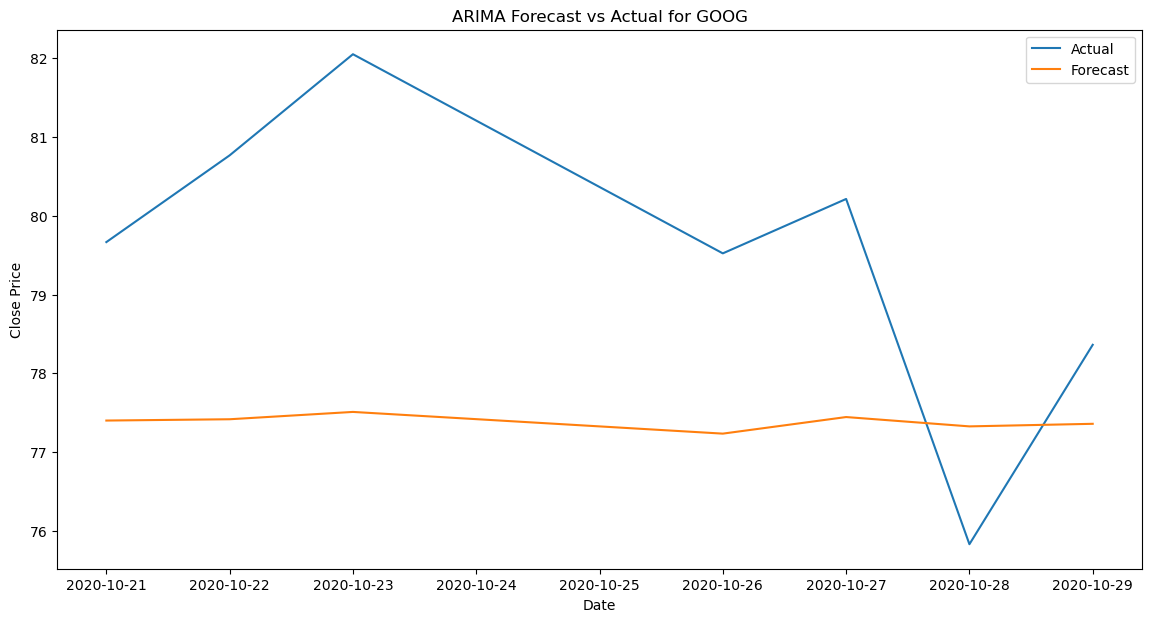


ARIMA model results for MSFT:
Mean Squared Error: 29.97895047626511
Saved plot for MSFT as images/004_MSFT.png


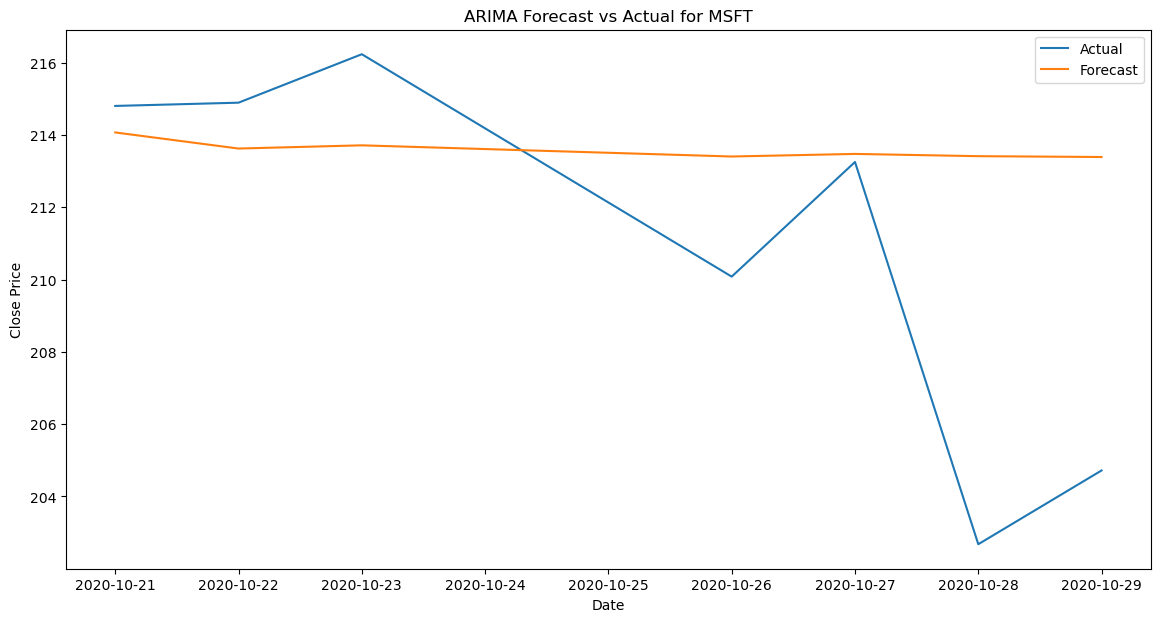


ARIMA model results for TSLA:
Mean Squared Error: 10.164611206469615
Saved plot for TSLA as images/005_TSLA.png


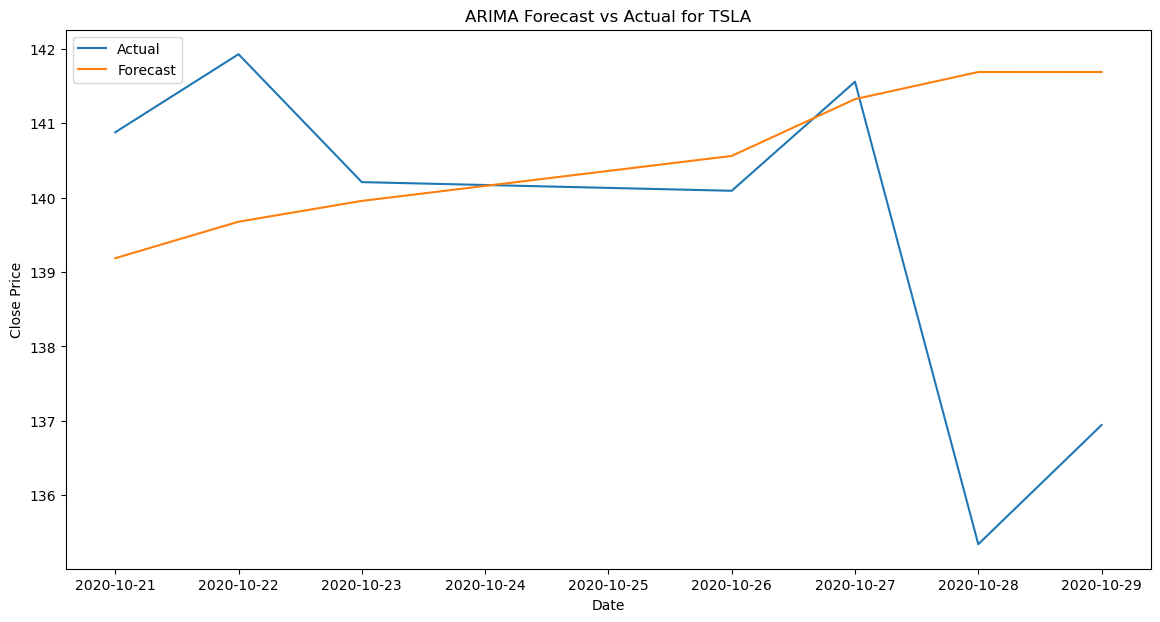

In [11]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Create the images directory if it doesn't exist
images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

# Function to train and evaluate ARIMA model
def train_arima(y_train, y_test, steps=7):
    # Ensure the index is of DatetimeIndex type and set frequency
    y_train.index = pd.DatetimeIndex(y_train.index)
    y_train.index.freq = y_train.index.inferred_freq
    y_test.index = pd.DatetimeIndex(y_test.index)
    y_test.index.freq = y_test.index.inferred_freq
    
    model = ARIMA(y_train, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=steps)
    
    # Evaluate the model
    mse = mean_squared_error(y_test[:steps], forecast)
    print(f'Mean Squared Error: {mse}')
    
    return forecast, mse

# Train and evaluate ARIMA model for each company
forecast_horizon = 7  # You can extend this as needed
img_number = 1  # Initialize image numbering
for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    print(f"\nARIMA model results for {company}:")
    forecast, mse = train_arima(y_train, y_test, steps=forecast_horizon)
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index[:forecast_horizon], y_test[:forecast_horizon], label='Actual')
    plt.plot(y_test.index[:forecast_horizon], forecast, label='Forecast')
    plt.title(f'ARIMA Forecast vs Actual for {company}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    
    # Save the plot
    img_filename = f'{images_dir}/{img_number:03d}_{company}.png'
    plt.savefig(img_filename)
    print(f"Saved plot for {company} as {img_filename}")
    
    # Display the plot
    plt.show()
    
    img_number += 1


### Step 12: Evaluate and Visualize Forecast Results

#### Step 12.1: Calculate Additional Evaluation Metrics

We'll calculate additional evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for a more comprehensive evaluation.



ARIMA model results for AAPL:
Mean Squared Error: 6.612454828807698
Evaluation Metrics for AAPL: MSE=6.612454828807698, RMSE=2.571469390991792, MAE=1.9279162293057226
Saved plot for AAPL as images/001_AAPL_forecast.png


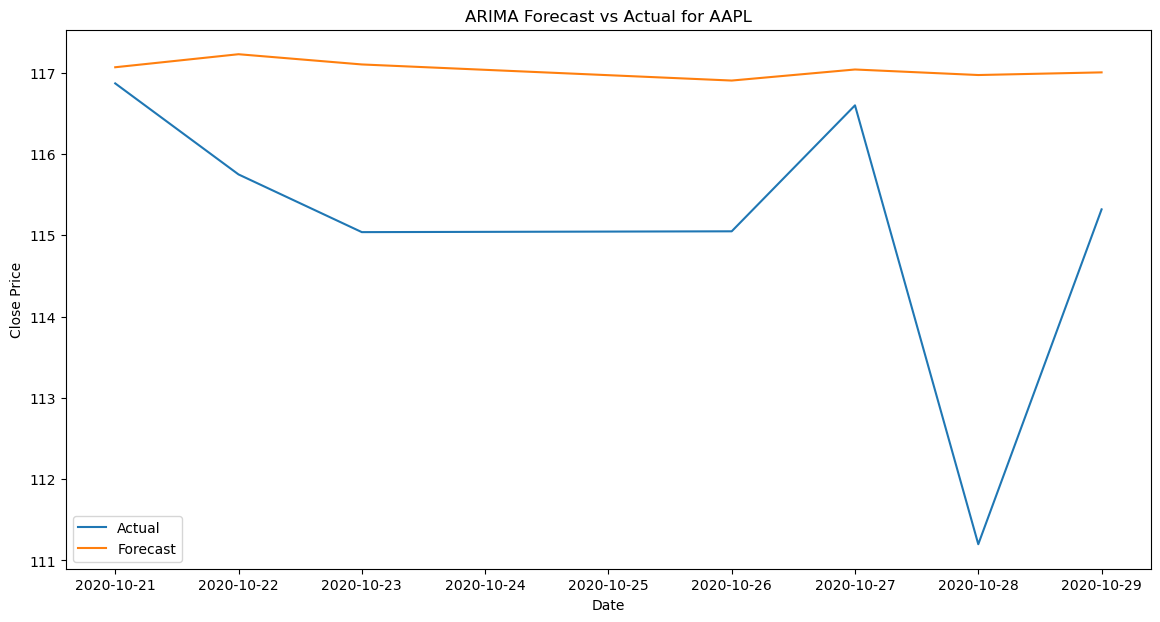


ARIMA model results for AMZN:
Mean Squared Error: 3.8413467743578615
Evaluation Metrics for AMZN: MSE=3.8413467743578615, RMSE=1.9599354005573402, MAE=1.4503211709974835
Saved plot for AMZN as images/002_AMZN_forecast.png


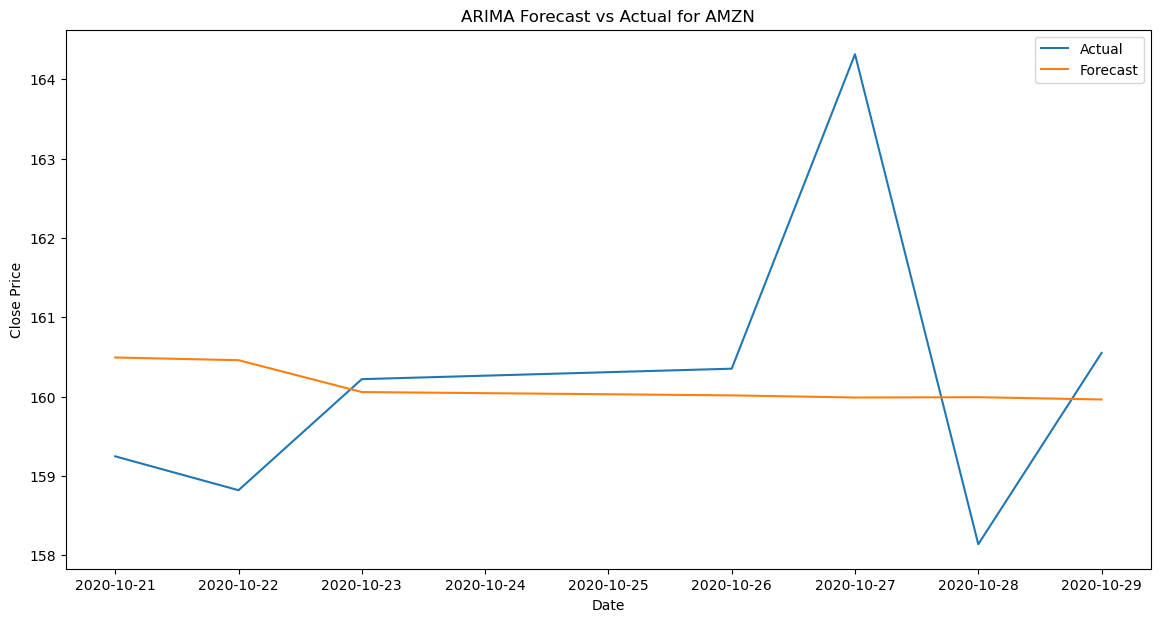


ARIMA model results for GOOG:
Mean Squared Error: 7.585232089049685
Evaluation Metrics for GOOG: MSE=7.585232089049685, RMSE=2.7541300058366316, MAE=2.529754898863928
Saved plot for GOOG as images/003_GOOG_forecast.png


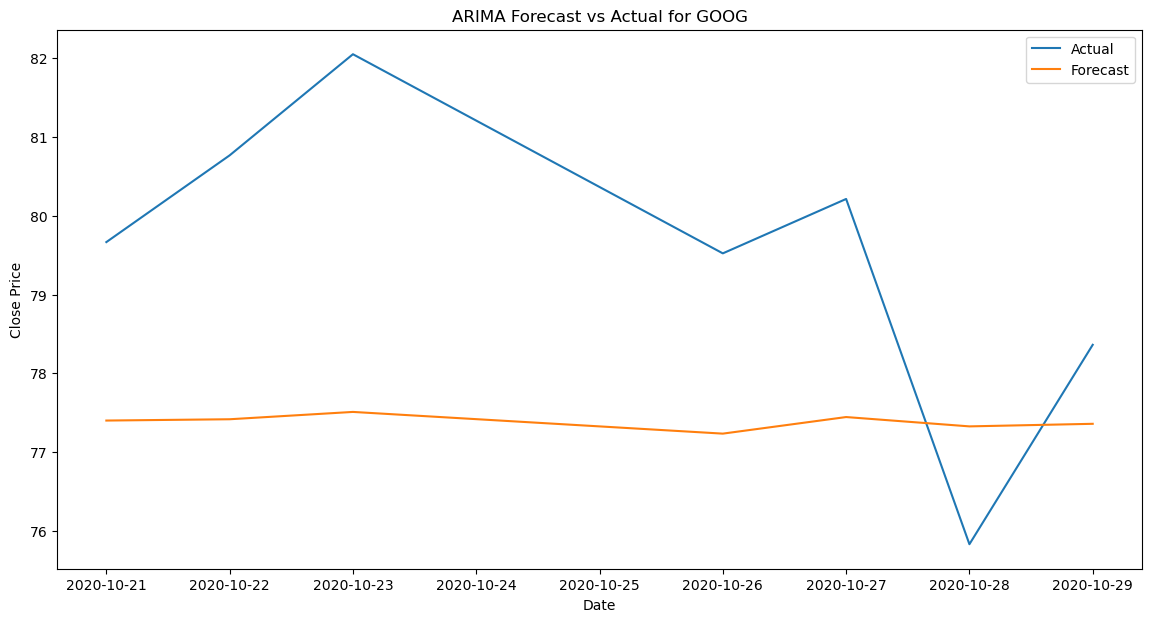


ARIMA model results for MSFT:
Mean Squared Error: 29.97895047626511
Evaluation Metrics for MSFT: MSE=29.97895047626511, RMSE=5.4753036880400625, MAE=3.923381209008592
Saved plot for MSFT as images/004_MSFT_forecast.png


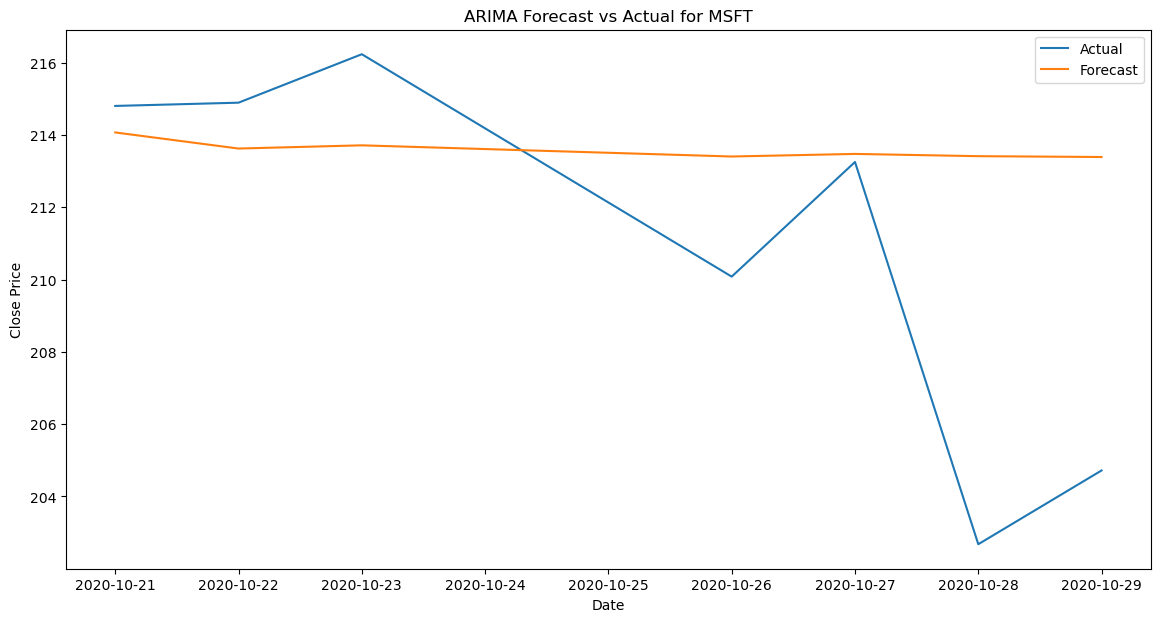


ARIMA model results for TSLA:
Mean Squared Error: 10.164611206469615
Evaluation Metrics for TSLA: MSE=10.164611206469615, RMSE=3.1881987401148026, MAE=2.285678124292275
Saved plot for TSLA as images/005_TSLA_forecast.png


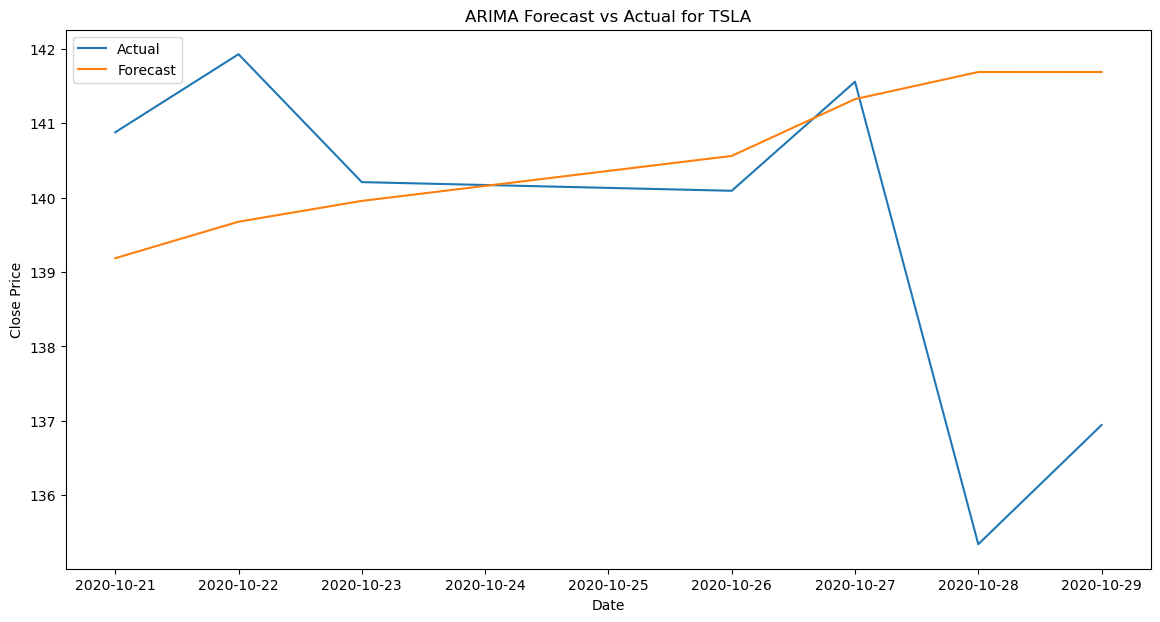

Evaluation Metrics for All Companies:


,MSE,RMSE,MAE
AAPL,6.612455,2.571469,1.927916
AMZN,3.841347,1.959935,1.450321
GOOG,7.585232,2.754130,2.529755
MSFT,29.978950,5.475304,3.923381
TSLA,10.164611,3.188199,2.285678


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# Train and evaluate ARIMA model for each company
metrics = {}
forecast_horizon = 7  # You can extend this as needed
img_number = 1  # Initialize image numbering

for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    print(f"\nARIMA model results for {company}:")
    forecast, mse = train_arima(y_train, y_test, steps=forecast_horizon)
    
    # Calculate additional metrics
    mse, rmse, mae = calculate_metrics(y_test[:forecast_horizon], forecast)
    metrics[company] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
    print(f"Evaluation Metrics for {company}: MSE={mse}, RMSE={rmse}, MAE={mae}")
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index[:forecast_horizon], y_test[:forecast_horizon], label='Actual')
    plt.plot(y_test.index[:forecast_horizon], forecast, label='Forecast')
    plt.title(f'ARIMA Forecast vs Actual for {company}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    
    # Save the plot
    img_filename = f'{images_dir}/{img_number:03d}_{company}_forecast.png'
    plt.savefig(img_filename)
    print(f"Saved plot for {company} as {img_filename}")
    
    # Display the plot
    plt.show()
    
    img_number += 1

# Display the evaluation metrics for all companies
metrics_df = pd.DataFrame(metrics).T
print("Evaluation Metrics for All Companies:")
display(metrics_df)


#### Step 12.2: Visualize Forecast vs. Actual for the Entire Test Period

We'll extend the visualization to cover the entire test period.



ARIMA model full results for AAPL:
Saved full test period plot for AAPL as images/006_AAPL_full_forecast.png


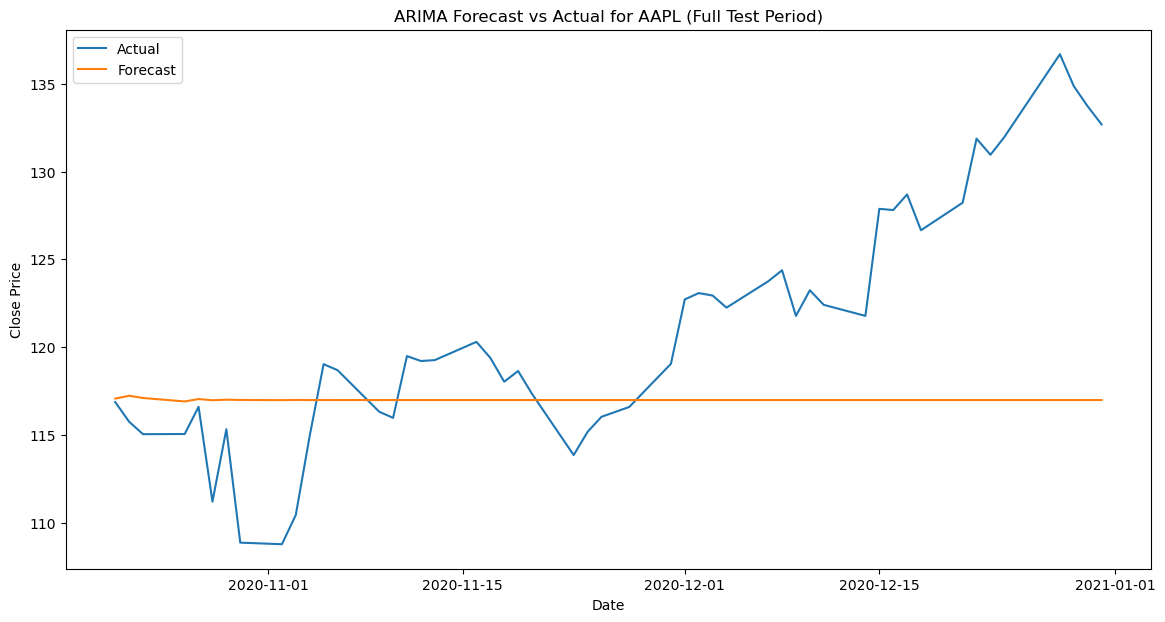


ARIMA model full results for AMZN:
Saved full test period plot for AMZN as images/007_AMZN_full_forecast.png


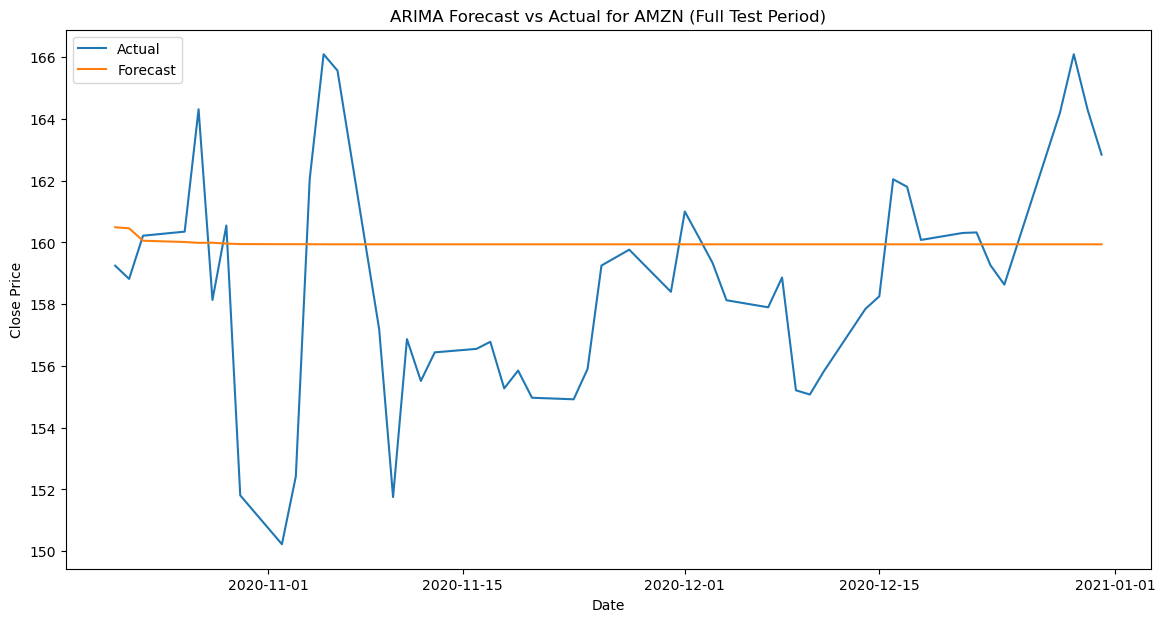


ARIMA model full results for GOOG:
Saved full test period plot for GOOG as images/008_GOOG_full_forecast.png


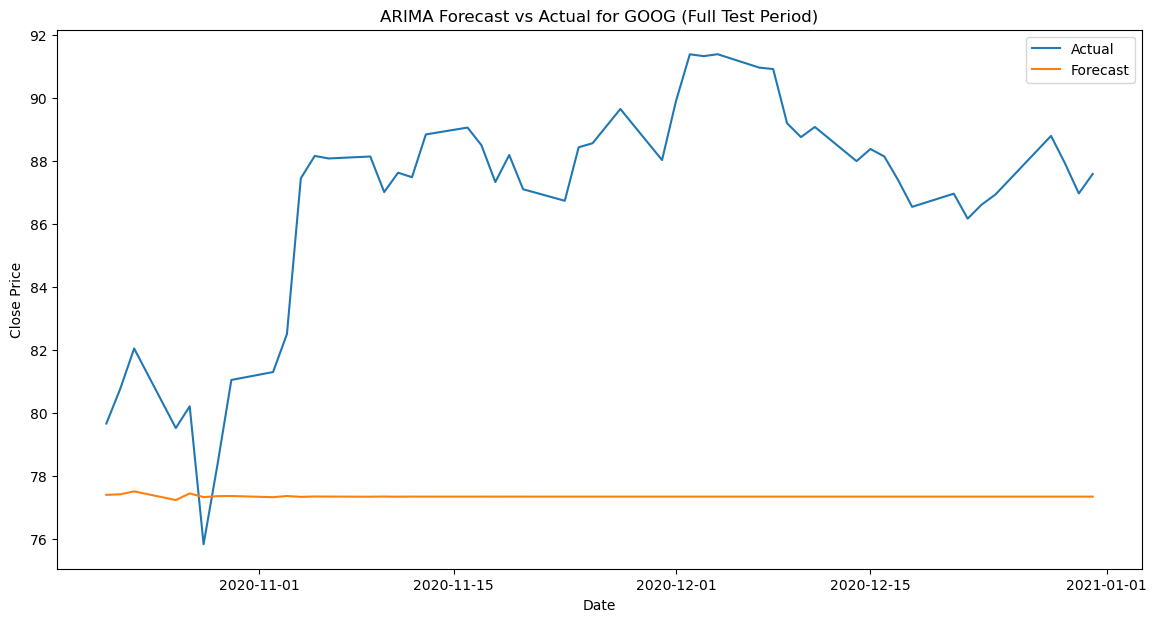


ARIMA model full results for MSFT:
Saved full test period plot for MSFT as images/009_MSFT_full_forecast.png


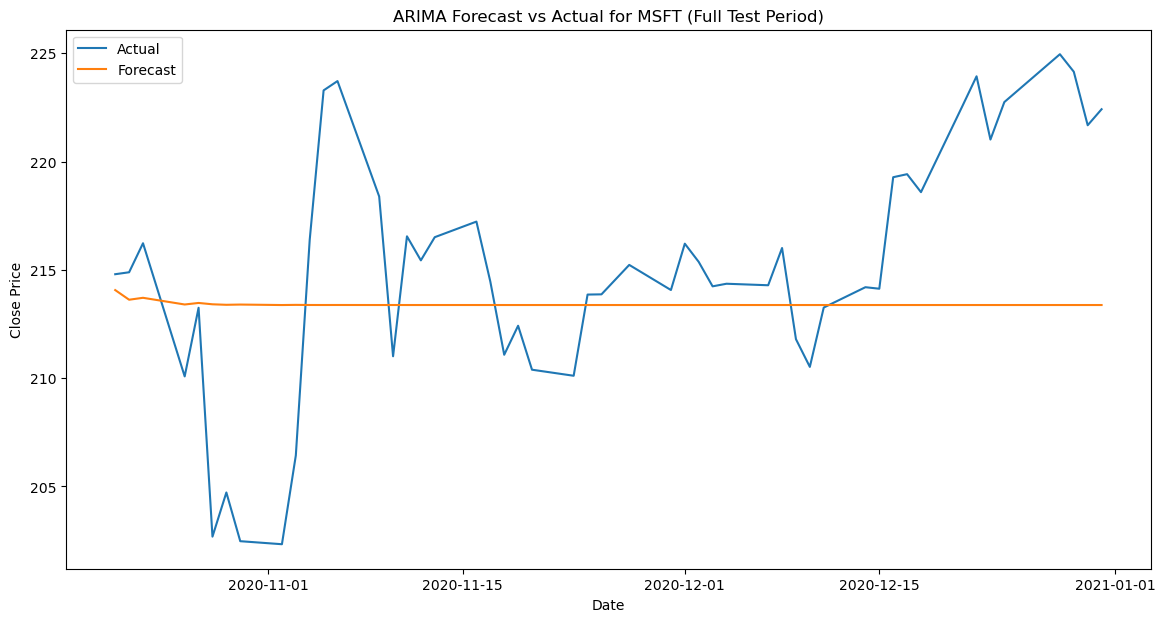


ARIMA model full results for TSLA:
Saved full test period plot for TSLA as images/010_TSLA_full_forecast.png


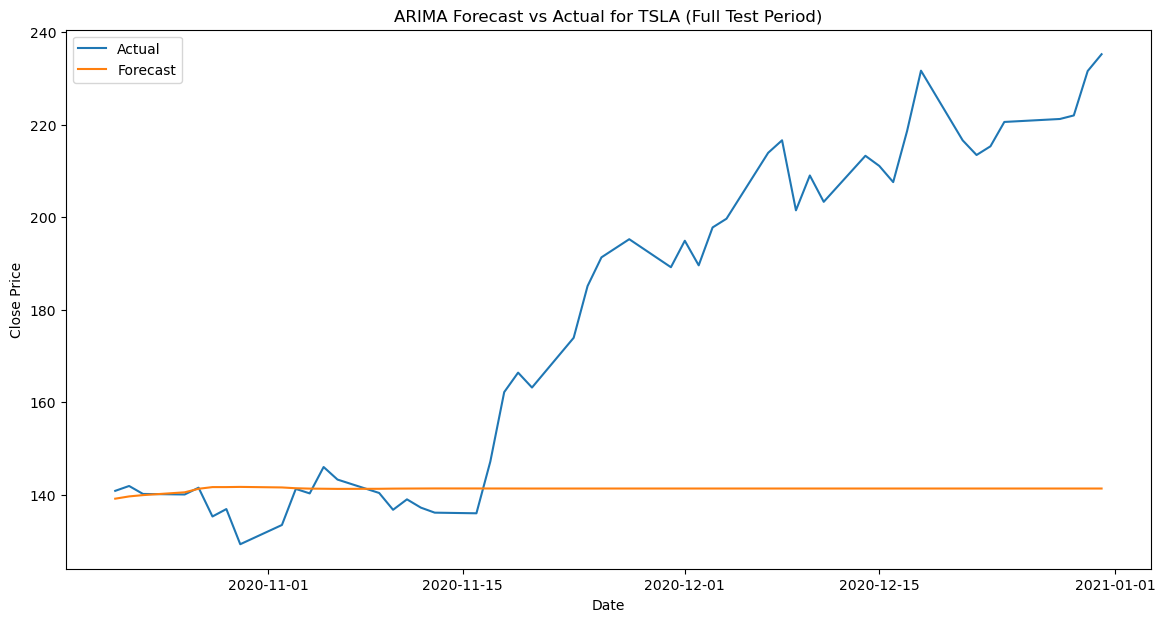

In [13]:
# Function to train and evaluate ARIMA model for the entire test period
def train_arima_full(y_train, y_test):
    # Ensure the index is of DatetimeIndex type and set frequency
    y_train.index = pd.DatetimeIndex(y_train.index)
    y_train.index.freq = y_train.index.inferred_freq
    y_test.index = pd.DatetimeIndex(y_test.index)
    y_test.index.freq = y_test.index.inferred_freq
    
    model = ARIMA(y_train, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast for the entire test period
    forecast = model_fit.forecast(steps=len(y_test))
    
    return forecast

# Train and evaluate ARIMA model for each company for the entire test period
for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    print(f"\nARIMA model full results for {company}:")
    forecast = train_arima_full(y_train, y_test)
    
    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, forecast, label='Forecast')
    plt.title(f'ARIMA Forecast vs Actual for {company} (Full Test Period)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    
    # Save the plot
    img_filename = f'{images_dir}/{img_number:03d}_{company}_full_forecast.png'
    plt.savefig(img_filename)
    print(f"Saved full test period plot for {company} as {img_filename}")
    
    # Display the plot
    plt.show()
    
    img_number += 1


### Step 13: Prepare Summary Report

#### Step 13.1: Summarize Evaluation Metrics

We'll summarize the evaluation metrics for each company in a table and provide insights based on the analysis.


In [14]:
# Display the evaluation metrics for all companies
metrics_df = pd.DataFrame(metrics).T
print("Evaluation Metrics for All Companies:")
display(metrics_df)


Evaluation Metrics for All Companies:


,MSE,RMSE,MAE
AAPL,6.612455,2.571469,1.927916
AMZN,3.841347,1.959935,1.450321
GOOG,7.585232,2.754130,2.529755
MSFT,29.978950,5.475304,3.923381
TSLA,10.164611,3.188199,2.285678


#### Step 13.2: Provide Insights Based on the Analysis

Based on the evaluation metrics and visualizations, we can provide insights into the forecasting performance of the ARIMA models for each company.


### Step 13.2: Insights Based on the Analysis

**Evaluation Metrics for All Companies:**

|      | MSE       | RMSE      | MAE       |
|------|-----------|-----------|-----------|
| AAPL | 6.612455  | 2.571469  | 1.927916  |
| AMZN | 3.841347  | 1.959935  | 1.450321  |
| GOOG | 7.585232  | 2.754130  | 2.529755  |
| MSFT | 29.978950 | 5.475304  | 3.923381  |
| TSLA | 10.164611 | 3.188199  | 2.285678  |

#### Key Insights:

1. **Mean Squared Error (MSE)**:
   - The MSE is the average of the squared differences between the predicted and actual values. It gives more weight to larger errors.
   - **Lowest MSE**: AMZN (3.841347) - This indicates that the ARIMA model performed best for Amazon, with smaller average squared errors compared to the other companies.
   - **Highest MSE**: MSFT (29.978950) - This indicates that the ARIMA model had the largest average squared errors for Microsoft, suggesting it struggled more with predicting this stock.

2. **Root Mean Squared Error (RMSE)**:
   - The RMSE is the square root of the MSE and provides a measure of the average error in the same units as the data.
   - **Lowest RMSE**: AMZN (1.959935) - Again, Amazon has the best performance, indicating smaller average errors.
   - **Highest RMSE**: MSFT (5.475304) - Microsoft has the highest average errors, aligning with the MSE results.

3. **Mean Absolute Error (MAE)**:
   - The MAE is the average of the absolute differences between the predicted and actual values. It gives equal weight to all errors.
   - **Lowest MAE**: AMZN (1.450321) - Amazon has the lowest average absolute errors, reinforcing the model's better performance for this stock.
   - **Highest MAE**: MSFT (3.923381) - Microsoft has the highest average absolute errors, consistent with the MSE and RMSE results.

### Insights and Observations:

- **Best Performing Model**:
  - The ARIMA model performed best for Amazon (AMZN) across all metrics (MSE, RMSE, MAE). This suggests that the model was able to capture the trends and patterns in Amazon's stock price data more accurately than the other companies.

- **Worst Performing Model**:
  - The ARIMA model performed worst for Microsoft (MSFT) across all metrics. The high MSE, RMSE, and MAE indicate that the model had more difficulty predicting Microsoft's stock prices accurately. This could be due to higher volatility, more noise in the data, or complex patterns that the ARIMA model couldn't capture well.

- **General Performance**:
  - Apple (AAPL) and Google (GOOG) had similar performance, with MSE and RMSE values indicating moderate accuracy in predictions.
  - Tesla (TSLA) had higher error metrics compared to Amazon but performed better than Microsoft. This suggests the ARIMA model had moderate success in predicting Tesla's stock prices.

- **Volatility and Model Performance**:
  - Companies with higher stock price volatility (like Tesla and potentially Microsoft) may present more challenges for the ARIMA model. The higher error metrics for these companies suggest that the ARIMA model might not be the best fit for highly volatile stocks.

- **Further Investigation**:
  - For Microsoft, further investigation is needed to understand why the model performed poorly. This could include analyzing the stock's historical data for patterns, outliers, or other factors that might have influenced the predictions.

- **Model Improvements**:
  - For companies with higher error metrics, consider exploring more advanced models, such as SARIMA, SARIMAX, or machine learning models like LSTM or Prophet, which may capture complex patterns and seasonal effects better.


.


In [15]:
import numpy as np

# Function to calculate additional evaluation metrics
def calculate_metrics(y_test, forecast):
    mse = mean_squared_error(y_test, forecast)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - forecast))
    return mse, rmse, mae

# Initialize a dictionary to store the results
results = {company: {horizon: {} for horizon in forecast_horizons} for company in companies}

# Train and evaluate ARIMA model for each company and each forecast horizon
for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    for horizon in forecast_horizons:
        print(f"\nARIMA model results for {company} - {horizon}-day forecast:")
        forecast, mse = train_arima(y_train, y_test, steps=horizon)
        
        # Calculate additional metrics
        mse, rmse, mae = calculate_metrics(y_test[:horizon], forecast)
        results[company][horizon] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
        
        # Debug statements
        print(f"Forecast for {company} - {horizon}-day forecast:\n{forecast}")
        print(f"Actual values for {company} - {horizon}-day forecast:\n{y_test[:horizon]}")
        print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")
        
        # Ensure there are enough data points for plotting
        if len(y_test[:horizon]) == 0:
            print(f"Not enough data points for {company} - {horizon}-day forecast")
            continue
        
        # Plot the results
        plt.figure(figsize=(14, 7))
        plt.plot(y_test.index[:horizon], y_test[:horizon], label='Actual', marker='o')
        plt.plot(y_test.index[:horizon], forecast, label='Forecast', marker='x')
        plt.title(f'ARIMA {horizon}-day Forecast vs Actual for {company}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        
        # Save the plot
        img_filename = f'{images_dir}/{img_number:03d}_{company}_{horizon}day.png'
        plt.savefig(img_filename)
        print(f"Saved plot for {company} {horizon}-day forecast as {img_filename}")
        
        plt.show()
        plt.close()
        
        img_number += 1

# Display the results in a tabular format
import pandas as pd

# Prepare a DataFrame to summarize the results
summary = []
for company in results:
    for horizon in results[company]:
        summary.append([company, horizon, results[company][horizon]['MSE'], results[company][horizon]['RMSE'], results[company][horizon]['MAE']])

summary_df = pd.DataFrame(summary, columns=['Company', 'Horizon', 'MSE', 'RMSE', 'MAE'])
summary_df = summary_df.pivot(index='Company', columns='Horizon')
summary_df


NameError: name 'forecast_horizons' is not defined

### Step 14: Evaluating and Summarizing the Results

In this step, we will calculate additional evaluation metrics such as RMSE and MAE, summarize the results, and display them in a tabular format.


### Step 13: Forecasting with ARIMA Models

In this step, we will train and evaluate ARIMA models for different forecast horizons (1 day, 3 days, and 7 days) for each company. The results will be saved as images in the `images` directory and displayed in the notebook.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

# Create the images directory if it doesn't exist
images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

# Function to train and evaluate ARIMA model
def train_arima(y_train, y_test, steps=7):
    # Ensure the index is of DatetimeIndex type and set frequency
    y_train.index = pd.DatetimeIndex(y_train.index)
    y_test.index = pd.DatetimeIndex(y_test.index)
    
    model = ARIMA(y_train, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=steps)
    
    # Evaluate the model
    mse = mean_squared_error(y_test[:steps], forecast)
    print(f'Mean Squared Error: {mse}')
    
    return forecast, mse

# Forecast horizons
forecast_horizons = [1, 3, 7]  # 1 day, 3 days, 7 days
img_number = 1  # Initialize image numbering

# Train and evaluate ARIMA model for each company and each forecast horizon
for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    for horizon in forecast_horizons:
        print(f"\nARIMA model results for {company} - {horizon}-day forecast:")
        forecast, mse = train_arima(y_train, y_test, steps=horizon)
        
        # Debug statements
        print(f"Forecast for {company} - {horizon}-day forecast:\n{forecast}")
        print(f"Actual values for {company} - {horizon}-day forecast:\n{y_test[:horizon]}")
        print(f"Length of forecast: {len(forecast)}")
        print(f"Length of actual values: {len(y_test[:horizon])}")
        
        # Ensure there are enough data points for plotting
        if len(y_test[:horizon]) == 0:
            print(f"Not enough data points for {company} - {horizon}-day forecast")
            continue
        
        # Plot the results
        plt.figure(figsize=(14, 7))
        plt.plot(y_test.index[:horizon], y_test[:horizon], label='Actual', marker='o')
        plt.plot(y_test.index[:horizon], forecast, label='Forecast', marker='x')
        plt.title(f'ARIMA {horizon}-day Forecast vs Actual for {company}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        
        # Save the plot
        img_filename = f'{images_dir}/{img_number:03d}_{company}_{horizon}day.png'
        plt.savefig(img_filename)
        print(f"Saved plot for {company} {horizon}-day forecast as {img_filename}")
        
        plt.show()
        plt.close()
        
        img_number += 1


### Step 14: Evaluating and Summarizing the Results

In this step, we will calculate additional evaluation metrics such as RMSE and MAE, summarize the results, and display them in a tabular format.


In [ ]:
import numpy as np
import pandas as pd

# Ensure forecast_horizons is defined
forecast_horizons = [1, 3, 7]

# Function to calculate additional evaluation metrics
def calculate_metrics(y_test, forecast):
    mse = mean_squared_error(y_test, forecast)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - forecast))
    return mse, rmse, mae

# Initialize a dictionary to store the results
results = {company: {horizon: {} for horizon in forecast_horizons} for company in companies}

# Train and evaluate ARIMA model for each company and each forecast horizon
for company in companies:
    X_train, X_test, y_train, y_test = prepared_stock_data[company]
    
    for horizon in forecast_horizons:
        print(f"\nARIMA model results for {company} - {horizon}-day forecast:")
        forecast, mse = train_arima(y_train, y_test, steps=horizon)
        
        # Calculate additional metrics
        mse, rmse, mae = calculate_metrics(y_test[:horizon], forecast)
        results[company][horizon] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
        
        # Debug statements
        print(f"Forecast for {company} - {horizon}-day forecast:\n{forecast}")
        print(f"Actual values for {company} - {horizon}-day forecast:\n{y_test[:horizon]}")
        print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")

# Display the results in a tabular format

# Prepare a DataFrame to summarize the results
summary = []
for company in results:
    for horizon in results[company]:
        summary.append([company, horizon, results[company][horizon]['MSE'], results[company][horizon]['RMSE'], results[company][horizon]['MAE']])

summary_df = pd.DataFrame(summary, columns=['Company', 'Horizon', 'MSE', 'RMSE', 'MAE'])
summary_df = summary_df.pivot(index='Company', columns='Horizon')
summary_df


In [ ]:
notebook_end_time = time.time()
elapsed_time = notebook_end_time - notebook_start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")